In [4]:
import struct
import numpy as np
from sklearn import neighbors, metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
def read_idx(filename):
    with open(filename, 'rb') as f:
        zero, data_type, dims=struct.unpack('>HBB', f.read(4))
        shape=tuple(struct.unpack('>I', f.read(4))[0] for d in range (dims))
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)

In [34]:
raw_train=read_idx("train-images.idx3-ubyte")
train_data=np.reshape(raw_train, (60000, 28*28))
train_label=read_idx("train-labels.idx1-ubyte")

raw_test=read_idx("t10k-images.idx3-ubyte")
test_data=np.reshape(raw_test, (10000, 28*28))
test_label=read_idx("t10k-labels.idx1-ubyte")

In [35]:
idx=(train_label==2)|(train_label==3)|(train_label==8)
X=train_data[idx]
Y=train_label[idx]
knn=neighbors.KNeighborsClassifier(n_neighbors=3).fit(X, Y)

In [40]:
idx=(test_label==2)|(test_label==3)|(test_label==8)
x_test=test_data[idx]
y_true=test_label[idx]
y_pred=knn.predict(x_test)

In [58]:
import itertools
def plot_confusion_matrix(cm, classes, normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        Print("Normalized Confusion Matrix")
    else:
        print('confusion matri, without noramlization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt='.2f' if normalize else 'd'
    thresh=cm.max()/2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],fmt),
                horizontalalignmnet="center",
                color="white" if cm[i,j]>thresh else "black")
        plt.tight_layout()
        plt.ylabel('True label')
        plt.x_label('predicted label')
        

confusion matri, without noramlization
[[1025    3    4]
 [   5 1001    4]
 [   6   16  952]]


AttributeError: Unknown property horizontalalignmnet

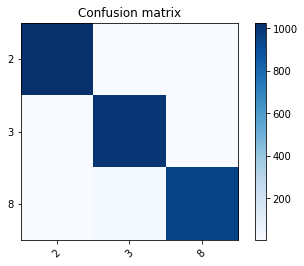

In [59]:
cm = metrics.confusion_matrix(y_true, y_pred)
plot_confusion_matrix(cm, ["2","3","8"], normalize=False)

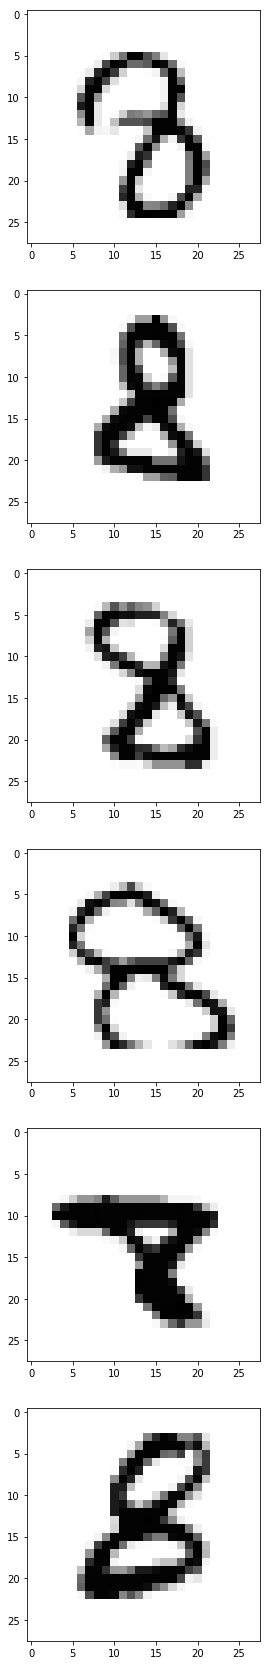

In [57]:
idx = np.where((y_pred==2)&(y_true==8))[0]
fig=plt.figure(figsize=(5,30))
for i in range (len(idx)):
    ax=fig.add_subplot(len(idx), 1, i+1)
    imgplot=ax.imshow(np.reshape(x_test[idx[i],:],(28, 28)), cmap=plt.cm.get_cmap("Greys"))
    imgplot.set_interpolation("nearest")
plt.show()